# Computer Vision Bootcamp: Assignment 2

## Reading

In [ ]:
# Import the needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

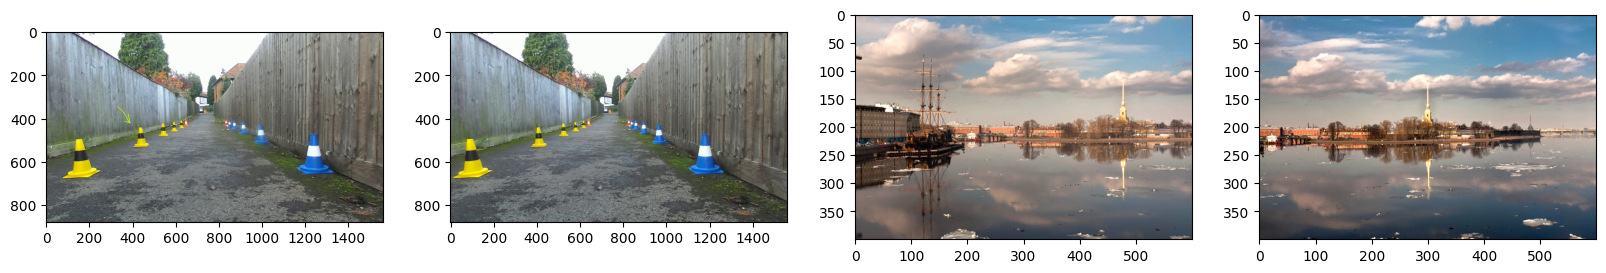

In [ ]:
# read the images and show them in one figure in RGB

left1 = cv2.cvtColor( cv2.imread("stereo_left.png"), cv2.COLOR_BGR2RGB)
right1 = cv2.cvtColor( cv2.imread("stereo_right.png"), cv2.COLOR_BGR2RGB)
left2 = cv2.cvtColor( cv2.imread("stitch_left.jpg"), cv2.COLOR_BGR2RGB)
right2 = cv2.cvtColor( cv2.imread("stitch_right.jpg"), cv2.COLOR_BGR2RGB)

plt.figure(figsize =(20,5))

plt.subplot(1,4,1)
plt.imshow(left1 )

plt.subplot(1,4,2)
plt.imshow(right1)

plt.subplot(1,4,3)
plt.imshow(left2)

plt.subplot(1,4,4)
plt.imshow(right2)

plt.show()



## Image Stitching

In [ ]:
# define and use the stitcher
stitcher = cv2.Stitcher_create()
status, result= stitcher.stitch([left2,right2])

# print the status of the operation
print(status)

0


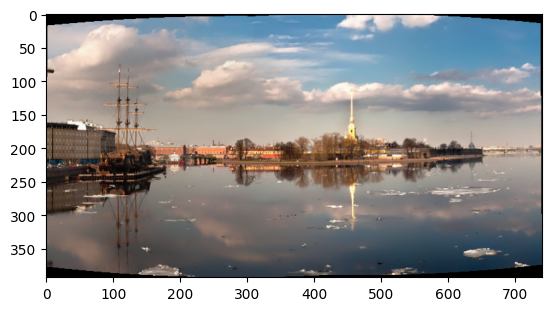

In [ ]:
# Show the stitiched (result) image
plt.imshow(result)
plt.show()

In [ ]:
# use the scaling function, scale the right image by a factor of 0.5 and show the results of stitching it with the unchanged left image (if there is a result)
scaled_right_image = cv2.resize(right1, None, fx=0.5, fy=0.5)

status, result= stitcher.stitch([left2,scaled_right_image])

# print the status of the operation
print(status)

if status == cv2.Stitcher_OK:
    cv2.imshow('Stitched Image', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Stitching failed!")

1
Stitching failed!


In [ ]:
# use the scaling function, scale the right image by a factor of 0.75 and show the results of stitching it with the unchanged left image (if there is a result)
scaled_right_image = cv2.resize(right1, None, fx=0.75 , fy=0.75)

status, result= stitcher.stitch([left2,scaled_right_image])

# print the status of the operation
print(status)

if status == cv2.Stitcher_OK:
    cv2.imshow('Stitched Image', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Stitching failed!")

1
Stitching failed!


## Depth

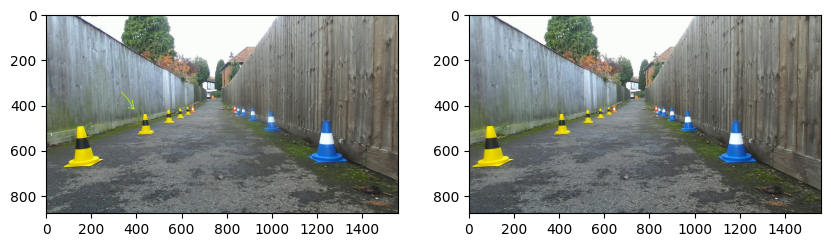

In [ ]:
# Load the stereo images and show them in RGB
plt.figure(figsize =(10,5))

plt.subplot(1,2,1)
plt.imshow(left1 )

plt.subplot(1,2,2)
plt.imshow(right1)

In [ ]:
from google.colab.patches import cv2_imshow

# convert both images to a suitable colour space
left = cv2.imread("stereo_left.png",0)
right = cv2.imread("stereo_right.png",0)

# Define and use the stereo function
stereo = cv2.StereoBM_create(numDisparities=32, blockSize=19)

# Compute the disparity map
disparity = stereo.compute(left, right)

# Set zero disparity values to avoid divide by zero error
disparity[disparity == 0] = 0.1

# Using a focal length of 13000 and a baseline of 120mm, find the depth in meters
len = 13000
baseline = 0.120
depth = len * baseline / disparity

# show the depth map
cv2.imshow(depth)

<ipython-input-51-68149d04bc40>:19: RuntimeWarning: divide by zero encountered in divide
  depth = len * baseline / disparity


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


What is the depth of the cone with the yellow arrow in the left image?

## Live Object detection

This task is done locally, download ultralytics locally and run a live detection using your laptop's camera a screenshot of how you detected an object in your room